# Logic

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1C_n_WBaoYg_cATNWbwOVlhL70AjOESMa?usp=sharing)


Notebook Jupyter ini berfungsi sebagai materi pendukung untuk topik-topik yang dibahas dalam __Bab 7 Logical Agents__, __Bab 8 First-Order Logic__ and __Bab 9 Inference in First-Order Logic__ dari buku *[Artificial Intelligence: A Modern Approach](http://aima.cs.berkeley.edu)*. Kami menggunakan implementasi dalam modul [logic.py](https://github.com/bscpnu/Praktikum-Kecerdasan-Komputasional/blob/main/Praktikum/2%20-%20Logical%20Agents/logic.py). Lihat [panduan praktikum logic](https://github.com/bscpnu/Praktikum-Kecerdasan-Komputasional/blob/main/Praktikum/2%20-%20Logical%20Agents/2%20Panduan%20Praktikum%20Logic.pdf) untuk petunjuk lebih lanjut.

Mari kita impor terlebih dahulu semua yang ada dalam modul logika.

Jalankan  shell berikut untuk mengunduh file-file sumber dari folder "Praktikum/2 - Logical Agents" jika file tersebut belum ada atau download disini [di sini](https://github.com/kcv-if/Modul-KK/tree/main/Praktikum/2%20-%20Logical%20Agents).

In [1]:
#linux
# %%capture 
# !wget \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/agents.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/csp.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/games.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/learning.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/logic.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/notebook.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/probabilistic_learning.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/search.py \
#   https://raw.githubusercontent.com/kcv-if/Modul-KK/refs/heads/main/Praktikum/2%20-%20Logical%20Agents/utils.py

jalankan Shell dibawah ini jika belum ada Aima-data atau donwload manual dari [link ini](https://github.com/farhanwew/Computational-Intelligence/raw/refs/heads/main/aima-data.zip)

In [2]:
#linux
# # %%capture 
# !wget "https://github.com/farhanwew/Computational-Intelligence/raw/refs/heads/main/aima-data.zip"
# !unzip -o aima-data.zip

# or if you prefer python:
# from zipfile import ZipFile
# with ZipFile("aima-data.zip") as z:
#     z.extractall(".")

In [3]:
# %%capture
# %pip install ipythonblocks
# %pip install qpsolvers

In [ ]:
from utils  import *
from logic import *
from notebook import psource

## CONTENTS
- Logical sentences
    - Expr
    - PropKB
    - Knowledge-based agents
    - Inference in propositional knowledge base
        - Truth table enumeration
        - Proof by resolution
        - Forward and backward chaining
        - DPLL
        - WalkSAT
        - SATPlan
    - FolKB
    - Inference in first order knowledge base
        - Unification
        - Forward chaining algorithm
        - Backward chaining algorithm

## Logical Sentences

The `Expr` class is designed to represent any kind of mathematical expression. The simplest type of `Expr` is a symbol, which can be defined with the function `Symbol`:

In [5]:
Symbol('x')

x

Or we can define multiple symbols at the same time with the function `symbols`:

In [6]:
(x, y, P, Q, f) = symbols('x, y, P, Q, f')

We can combine `Expr`s with the regular Python infix and prefix operators. Here's how we would form the logical sentence "P and not Q":

In [7]:
P & ~Q

(P & ~Q)

This works because the `Expr` class overloads the `&` operator with this definition:

```python
def __and__(self, other): return Expr('&',  self, other)```
     
and does similar overloads for the other operators. An `Expr` has two fields: `op` for the operator, which is always a string, and `args` for the arguments, which is a tuple of 0 or more expressions. By "expression," I mean either an instance of `Expr`, or a number. Let's take a look at the fields for some `Expr` examples:

In [8]:
sentence = P & ~Q

sentence.op

'&'

In [9]:
sentence.args

(P, ~Q)

In [10]:
P.op

'P'

In [11]:
P.args

()

In [12]:
Pxy = P(x, y)

Pxy.op

'P'

In [13]:
Pxy.args

(x, y)

It is important to note that the `Expr` class does not define the *logic* of Propositional Logic sentences; it just gives you a way to *represent* expressions. Think of an `Expr` as an [abstract syntax tree](https://en.wikipedia.org/wiki/Abstract_syntax_tree).  Each of the `args` in an `Expr` can be either a symbol, a number, or a nested `Expr`. We can nest these trees to any depth. Here is a deply nested `Expr`:

In [14]:
3 * f(x, y) + P(y) / 2 + 1

(((3 * f(x, y)) + (P(y) / 2)) + 1)

## Operators for Constructing Logical Sentences

Here is a table of the operators that can be used to form sentences. Note that we have a problem: we want to use Python operators to make sentences, so that our programs (and our interactive sessions like the one here) will show simple code. But Python does not allow implication arrows as operators, so for now we have to use a more verbose notation that Python does allow: `|'==>'|` instead of just `==>`. Alternately, you can always use the more verbose `Expr` constructor forms:

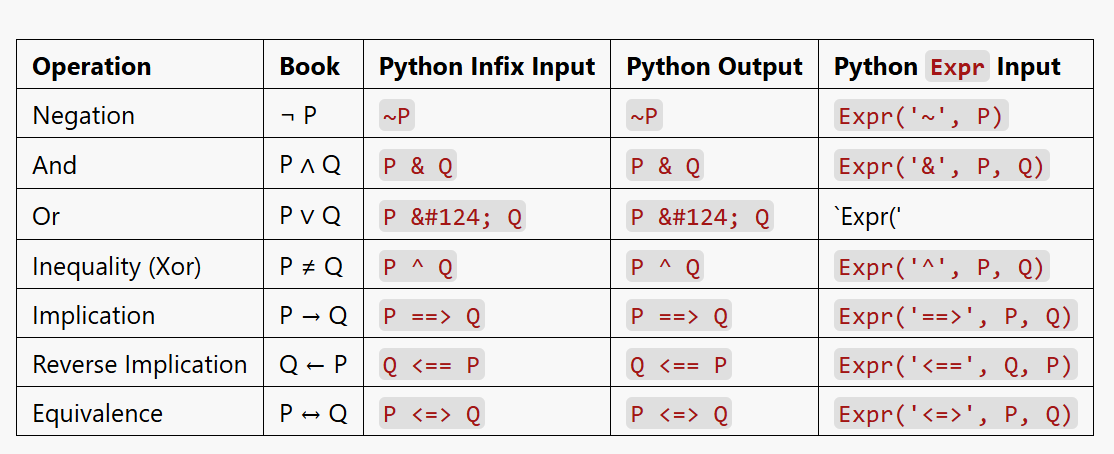


Here's an example of defining a sentence with an implication arrow:

In [15]:
~(P & Q)  |'==>'|  (~P | ~Q)

(~(P & Q) ==> (~P | ~Q))

## `expr`: a Shortcut for Constructing Sentences

If the `|'==>'|` notation looks ugly to you, you can use the function `expr` instead:

In [16]:
expr('~(P & Q)  ==>  (~P | ~Q)')

(~(P & Q) ==> (~P | ~Q))

`expr` takes a string as input, and parses it into an `Expr`. The string can contain arrow operators: `==>`, `<==`, or `<=>`, which are handled as if they were regular Python infix operators. And `expr` automatically defines any symbols, so you don't need to pre-define them:

In [17]:
expr('sqrt(b ** 2 - 4 * a * c)')

sqrt(((b ** 2) - ((4 * a) * c)))

For now that's all you need to know about `expr`. If you are interested, we explain the messy details of how `expr` is implemented and how `|'==>'|` is handled in the appendix.

## Propositional Knowledge Bases: `PropKB`

The class `PropKB` can be used to represent a knowledge base of propositional logic sentences.

We see that the class `KB` has four methods, apart from `__init__`. A point to note here: the `ask` method simply calls the `ask_generator` method. Thus, this one has already been implemented, and what you'll have to actually implement when you create your own knowledge base class (though you'll probably never need to, considering the ones we've created for you) will be the `ask_generator` function and not the `ask` function itself.

The class `PropKB` now.
* `__init__(self, sentence=None)` : The constructor `__init__` creates a single field `clauses` which will be a list of all the sentences of the knowledge base. Note that each one of these sentences will be a 'clause' i.e. a sentence which is made up of only literals and `or`s.
* `tell(self, sentence)` : When you want to add a sentence to the KB, you use the `tell` method. This method takes a sentence, converts it to its CNF, extracts all the clauses, and adds all these clauses to the `clauses` field. So, you need not worry about `tell`ing only clauses to the knowledge base. You can `tell` the knowledge base a sentence in any form that you wish; converting it to CNF and adding the resulting clauses will be handled by the `tell` method.
* `ask_generator(self, query)` : The `ask_generator` function is used by the `ask` function. It calls the `tt_entails` function, which in turn returns `True` if the knowledge base entails query and `False` otherwise. The `ask_generator` itself returns an empty dict `{}` if the knowledge base entails query and `None` otherwise. This might seem a little bit weird to you. After all, it makes more sense just to return a `True` or a `False` instead of the `{}` or `None` But this is done to maintain consistency with the way things are in First-Order Logic, where an `ask_generator` function is supposed to return all the substitutions that make the query true. Hence the dict, to return all these substitutions. I will be mostly be using the `ask` function which returns a `{}` or a `False`, but if you don't like this, you can always use the `ask_if_true` function which returns a `True` or a `False`.
* `retract(self, sentence)` : This function removes all the clauses of the sentence given, from the knowledge base. Like the `tell` function, you don't have to pass clauses to remove them from the knowledge base; any sentence will do fine. The function will take care of converting that sentence to clauses and then remove those.

## Wumpus World KB
Let us create a `PropKB` for the wumpus world with the sentences mentioned in `section 7.4.3`.

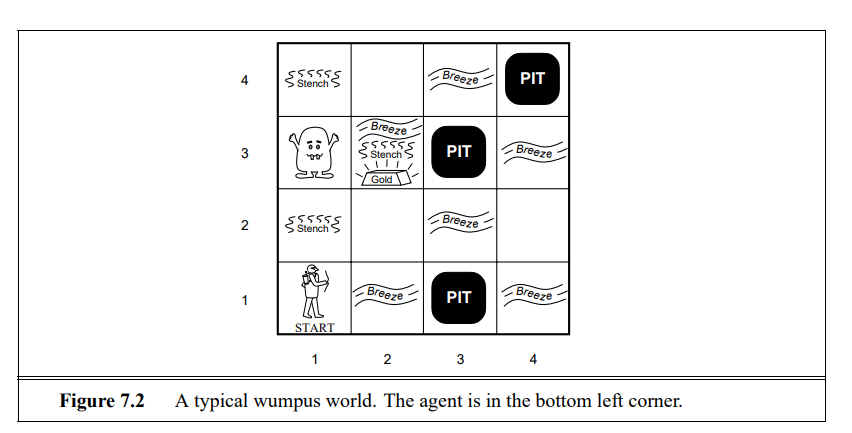

In [18]:
wumpus_kb = PropKB()

We define the symbols we use in our clauses.<br/>
$P_{x, y}$ is true if there is a pit in `[x, y]`.<br/>
$B_{x, y}$ is true if the agent senses breeze in `[x, y]`.<br/>

In [19]:
P11, P12, P21, P22, P31, B11, B21 = expr('P11, P12, P21, P22, P31, B11, B21')

Now we tell sentences based on `section 7.4.3`.<br/>
There is no pit in `[1,1]`.

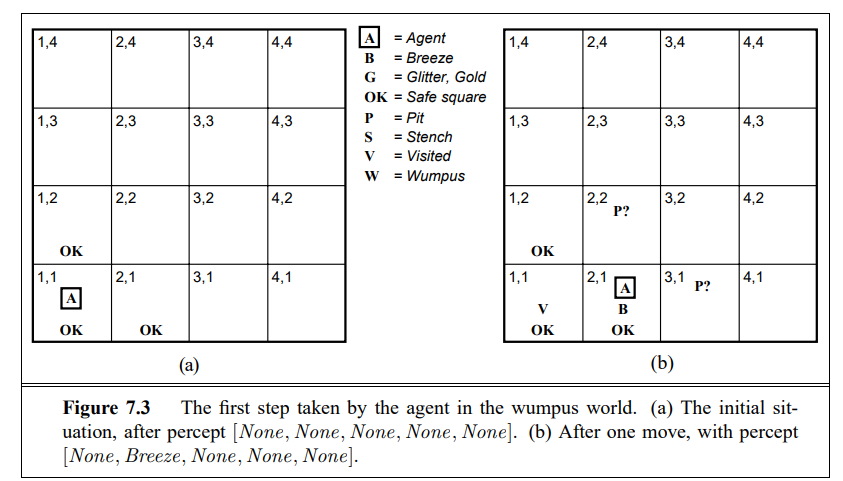

In [20]:
wumpus_kb.tell(~P11)

A square is breezy if and only if there is a pit in a neighboring square. This has to be stated for each square but for now, we include just the relevant squares.

In [21]:
wumpus_kb.tell(B11 | '<=>' | ((P12 | P21)))
wumpus_kb.tell(B21 | '<=>' | ((P11 | P22 | P31)))

Now we include the breeze percepts for the first two squares leading up to the situation in `Figure 7.3(b)`

In [22]:
wumpus_kb.tell(~B11)
wumpus_kb.tell(B21)

We can check the clauses stored in a `KB` by accessing its `clauses` variable

In [23]:
wumpus_kb.clauses

[~P11,
 (~P12 | B11),
 (~P21 | B11),
 (P12 | P21 | ~B11),
 (~P11 | B21),
 (~P22 | B21),
 (~P31 | B21),
 (P11 | P22 | P31 | ~B21),
 ~B11,
 B21]

We see that the equivalence $B_{1, 1} \iff (P_{1, 2} \lor P_{2, 1})$ was automatically converted to two implications which were inturn converted to CNF which is stored in the `KB`.<br/>
$B_{1, 1} \iff (P_{1, 2} \lor P_{2, 1})$ was split into $B_{1, 1} \implies (P_{1, 2} \lor P_{2, 1})$ and $B_{1, 1} \Longleftarrow (P_{1, 2} \lor P_{2, 1})$.<br/>
$B_{1, 1} \implies (P_{1, 2} \lor P_{2, 1})$ was converted to $P_{1, 2} \lor P_{2, 1} \lor \neg B_{1, 1}$.<br/>
$B_{1, 1} \Longleftarrow (P_{1, 2} \lor P_{2, 1})$ was converted to $\neg (P_{1, 2} \lor P_{2, 1}) \lor B_{1, 1}$ which becomes $(\neg P_{1, 2} \lor B_{1, 1}) \land (\neg P_{2, 1} \lor B_{1, 1})$ after applying De Morgan's laws and distributing the disjunction.<br/>
$B_{2, 1} \iff (P_{1, 1} \lor P_{2, 2} \lor P_{3, 2})$ is converted in similar manner.

## Knowledge based agents

A knowledge-based agent is a simple generic agent that maintains and handles a knowledge base.
The knowledge base may initially contain some background knowledge.
<br>
The purpose of a KB agent is to provide a level of abstraction over knowledge-base manipulation and is to be used as a base class for agents that work on a knowledge base.
<br>
Given a percept, the KB agent adds the percept to its knowledge base, asks the knowledge base for the best action, and tells the knowledge base that it has in fact taken that action.
<br>
Our implementation of `KB-Agent` is encapsulated in a class `KB_AgentProgram` which inherits from the `KB` class.
<br>
Let's have a look.

In [25]:
psource(KBAgentProgram)

The helper functions `make_percept_sentence`, `make_action_query` and `make_action_sentence` are all aptly named and as expected,
`make_percept_sentence` makes first-order logic sentences about percepts we want our agent to receive,
`make_action_query` asks the underlying `KB` about the action that should be taken and
`make_action_sentence` tells the underlying `KB` about the action it has just taken.

## Inference in Propositional Knowledge Base
In this section we will look at two algorithms to check if a sentence is entailed by the `KB`. Our goal is to decide whether $\text{KB} \vDash \alpha$ for some sentence $\alpha$.
### Truth Table Enumeration
It is a model-checking approach which, as the name suggests, enumerates all possible models in which the `KB` is true and checks if $\alpha$ is also true in these models. We list the $n$ symbols in the `KB` and enumerate the $2^{n}$ models in a depth-first manner and check the truth of `KB` and $\alpha$.

In [26]:
psource(tt_check_all)

The algorithm basically computes every line of the truth table $KB\implies \alpha$ and checks if it is true everywhere.
<br>
If symbols are defined, the routine recursively constructs every combination of truth values for the symbols and then, 
it checks whether `model` is consistent with `kb`.
The given models correspond to the lines in the truth table,
which have a `true` in the KB column, 
and for these lines it checks whether the query evaluates to true
<br>
`result = pl_true(alpha, model)`.
<br>
<br>
In short, `tt_check_all` evaluates this logical expression for each `model`
<br>
`pl_true(kb, model) => pl_true(alpha, model)`
<br>
which is logically equivalent to
<br>
`pl_true(kb, model) & ~pl_true(alpha, model)` 
<br>
that is, the knowledge base and the negation of the query are logically inconsistent.
<br>
<br>
`tt_entails()` just extracts the symbols from the query and calls `tt_check_all()` with the proper parameters.


In [27]:
psource(tt_entails)

Keep in mind that for two symbols P and Q, P => Q is false only when P is `True` and Q is `False`.
Example usage of `tt_entails()`:

In [28]:
tt_entails(P & Q, Q)

True

P & Q is True only when both P and Q are True. Hence, (P & Q) => Q is True

In [29]:
tt_entails(P | Q, Q)

False

In [30]:
tt_entails(P | Q, P)

False

If we know that P | Q is true, we cannot infer the truth values of P and Q. 
Hence (P | Q) => Q is False and so is (P | Q) => P.

In [31]:
(A, B, C, D, E, F, G) = symbols('A, B, C, D, E, F, G')
tt_entails(A & (B | C) & D & E & ~(F | G), A & D & E & ~F & ~G)

True

We can see that for the KB to be true, A, D, E have to be True and F and G have to be False.
Nothing can be said about B or C.

Coming back to our problem, note that `tt_entails()` takes an `Expr` which is a conjunction of clauses as the input instead of the `KB` itself. 
You can use the `ask_if_true()` method of `PropKB` which does all the required conversions. 
Let's check what `wumpus_kb` tells us about $P_{1, 1}$.

In [32]:
wumpus_kb.ask_if_true(~P11), wumpus_kb.ask_if_true(P11)

(True, False)

Looking at Figure 7.9 we see that in all models in which the knowledge base is `True`, $P_{1, 1}$ is `False`. It makes sense that `ask_if_true()` returns `True` for $\alpha = \neg P_{1, 1}$ and `False` for $\alpha = P_{1, 1}$. This begs the question, what if $\alpha$ is `True` in only a portion of all models. Do we return `True` or `False`? This doesn't rule out the possibility of $\alpha$ being `True` but it is not entailed by the `KB` so we return `False` in such cases. We can see this is the case for $P_{2, 2}$ and $P_{3, 1}$.

In [33]:
wumpus_kb.ask_if_true(~P22), wumpus_kb.ask_if_true(P22)

(False, False)

### Proof by Resolution
Recall that our goal is to check whether $\text{KB} \vDash \alpha$ i.e. is $\text{KB} \implies \alpha$ true in every model. Suppose we wanted to check if $P \implies Q$ is valid. We check the satisfiability of $\neg (P \implies Q)$, which can be rewritten as $P \land \neg Q$. If $P \land \neg Q$ is unsatisfiable, then $P \implies Q$ must be true in all models. This gives us the result "$\text{KB} \vDash \alpha$ <em>if and only if</em> $\text{KB} \land \neg \alpha$ is unsatisfiable".<br/>
This technique corresponds to <em>proof by <strong>contradiction</strong></em>, a standard mathematical proof technique. We assume $\alpha$ to be false and show that this leads to a contradiction with known axioms in $\text{KB}$. We obtain a contradiction by making valid inferences using inference rules. In this proof we use a single inference rule, <strong>resolution</strong> which states $(l_1 \lor \dots \lor l_k) \land (m_1 \lor \dots \lor m_n) \land (l_i \iff \neg m_j) \implies l_1 \lor \dots \lor l_{i - 1} \lor l_{i + 1} \lor \dots \lor l_k \lor m_1 \lor \dots \lor m_{j - 1} \lor m_{j + 1} \lor \dots \lor m_n$. Applying the resolution yields us a clause which we add to the KB. We keep doing this until:

* There are no new clauses that can be added, in which case $\text{KB} \nvDash \alpha$.
* Two clauses resolve to yield the <em>empty clause</em>, in which case $\text{KB} \vDash \alpha$.

The <em>empty clause</em> is equivalent to <em>False</em> because it arises only from resolving two complementary
unit clauses such as $P$ and $\neg P$ which is a contradiction as both $P$ and $\neg P$ can't be <em>True</em> at the same time.

There is  one catch however, the algorithm that implements proof by resolution cannot handle complex sentences. 
Implications and bi-implications have to be simplified into simpler clauses. 
We already know that *every sentence of a propositional logic is logically equivalent to a conjunction of clauses*.
We will use this fact to our advantage and simplify the input sentence into the **conjunctive normal form** (CNF) which is a conjunction of disjunctions of literals.
For eg:
<br>
$$(A\lor B)\land (\neg B\lor C\lor\neg D)\land (D\lor\neg E)$$
This is equivalent to the POS (Product of sums) form in digital electronics.
<br>
Here's an outline of how the conversion is done:
1. Convert bi-implications to implications
<br>
$\alpha\iff\beta$ can be written as $(\alpha\implies\beta)\land(\beta\implies\alpha)$
<br>
This also applies to compound sentences
<br>
$\alpha\iff(\beta\lor\gamma)$ can be written as $(\alpha\implies(\beta\lor\gamma))\land((\beta\lor\gamma)\implies\alpha)$
<br>
2. Convert implications to their logical equivalents
<br>
$\alpha\implies\beta$ can be written as $\neg\alpha\lor\beta$
<br>
3. Move negation inwards
<br>
CNF requires atomic literals. Hence, negation cannot appear on a compound statement.
De Morgan's laws will be helpful here.
<br>
$\neg(\alpha\land\beta)\equiv(\neg\alpha\lor\neg\beta)$
<br>
$\neg(\alpha\lor\beta)\equiv(\neg\alpha\land\neg\beta)$
<br>
4. Distribute disjunction over conjunction
<br>
Disjunction and conjunction are distributive over each other.
Now that we only have conjunctions, disjunctions and negations in our expression, 
we will distribute disjunctions over conjunctions wherever possible as this will give us a sentence which is a conjunction of simpler clauses, 
which is what we wanted in the first place.
<br>
We need a term of the form
<br>
$(\alpha_{1}\lor\alpha_{2}\lor\alpha_{3}...)\land(\beta_{1}\lor\beta_{2}\lor\beta_{3}...)\land(\gamma_{1}\lor\gamma_{2}\lor\gamma_{3}...)\land...$
<br>
<br>
The `to_cnf` function executes this conversion using helper subroutines.

In [34]:
psource(to_cnf)

`to_cnf` calls three subroutines.
<br>
`eliminate_implications` converts bi-implications and implications to their logical equivalents.
<br>
`move_not_inwards` removes negations from compound statements and moves them inwards using De Morgan's laws.
<br>
`distribute_and_over_or` distributes disjunctions over conjunctions.
<br>
Run the cell below for implementation details.

In [35]:
psource(eliminate_implications)
psource(move_not_inwards)
psource(distribute_and_over_or)

Let's convert some sentences to see how it works


In [36]:
A, B, C, D = expr('A, B, C, D')
to_cnf(A |'<=>'| B)

((A | ~B) & (B | ~A))

In [37]:
to_cnf(A |'<=>'| (B & C))

((A | ~B | ~C) & (B | ~A) & (C | ~A))

In [38]:
to_cnf(A & (B | (C & D)))

(A & (C | B) & (D | B))

In [39]:
to_cnf((A |'<=>'| ~B) |'==>'| (C | ~D))

((B | ~A | C | ~D) & (A | ~A | C | ~D) & (B | ~B | C | ~D) & (A | ~B | C | ~D))

Coming back to our resolution problem, we can see how the `to_cnf` function is utilized here

In [40]:
psource(pl_resolution)

In [41]:
pl_resolution(wumpus_kb, ~P11), pl_resolution(wumpus_kb, P11)

(True, False)

In [42]:
pl_resolution(wumpus_kb, ~P22), pl_resolution(wumpus_kb, P22)

(False, False)

### Forward and backward chaining
Previously, we said we will look at two algorithms to check if a sentence is entailed by the `KB`. Here's a third one. 
The difference here is that our goal now is to determine if a knowledge base of definite clauses entails a single proposition symbol *q* - the query.
There is a catch however - the knowledge base can only contain **Horn clauses**.
<br>
#### Horn Clauses
Horn clauses can be defined as a *disjunction* of *literals* with **at most** one positive literal. 
<br>
A Horn clause with exactly one positive literal is called a *definite clause*.
<br>
A Horn clause might look like 
<br>
$\neg a\lor\neg b\lor\neg c\lor\neg d... \lor z$
<br>
This, coincidentally, is also a definite clause.
<br>
Using De Morgan's laws, the example above can be simplified to 
<br>
$a\land b\land c\land d ... \implies z$
<br>
This seems like a logical representation of how humans process known data and facts. 
Assuming percepts `a`, `b`, `c`, `d` ... to be true simultaneously, we can infer `z` to also be true at that point in time. 
There are some interesting aspects of Horn clauses that make algorithmic inference or *resolution* easier.
- Definite clauses can be written as implications:
<br>
The most important simplification a definite clause provides is that it can be written as an implication.
The premise (or the knowledge that leads to the implication) is a conjunction of positive literals.
The conclusion (the implied statement) is also a positive literal.
The sentence thus becomes easier to understand.
The premise and the conclusion are conventionally called the *body* and the *head* respectively.
A single positive literal is called a *fact*.
- Forward chaining and backward chaining can be used for inference from Horn clauses:
<br>
Forward chaining is semantically identical to `AND-OR-Graph-Search` from the chapter on search algorithms.
Implementational details will be explained shortly.
- Deciding entailment with Horn clauses is linear in size of the knowledge base:
<br>
Surprisingly, the forward and backward chaining algorithms traverse each element of the knowledge base at most once, greatly simplifying the problem.
<br>
<br>
The function `pl_fc_entails` implements forward chaining to see if a knowledge base `KB` entails a symbol `q`.
<br>
Before we proceed further, note that `pl_fc_entails` doesn't use an ordinary `KB` instance. 
The knowledge base here is an instance of the `PropDefiniteKB` class, derived from the `PropKB` class, 
but modified to store definite clauses.
<br>
The main point of difference arises in the inclusion of a helper method to `PropDefiniteKB` that returns a list of clauses in KB that have a given symbol `p` in their premise.

In [43]:
psource(PropDefiniteKB.clauses_with_premise)

Let's now have a look at the `pl_fc_entails` algorithm.

In [44]:
psource(pl_fc_entails)

The function accepts a knowledge base `KB` (an instance of `PropDefiniteKB`) and a query `q` as inputs.
<br>
<br>
`count` initially stores the number of symbols in the premise of each sentence in the knowledge base.
<br>
The `conjuncts` helper function separates a given sentence at conjunctions.
<br>
`inferred` is initialized as a *boolean* defaultdict. 
This will be used later to check if we have inferred all premises of each clause of the agenda.
<br>
`agenda` initially stores a list of clauses that the knowledge base knows to be true.
The `is_prop_symbol` helper function checks if the given symbol is a valid propositional logic symbol.
<br>
<br>
We now iterate through `agenda`, popping a symbol `p` on each iteration.
If the query `q` is the same as `p`, we know that entailment holds.
<br>
The agenda is processed, reducing `count` by one for each implication with a premise `p`.
A conclusion is added to the agenda when `count` reaches zero. This means we know all the premises of that particular implication to be true.
<br>
`clauses_with_premise` is a helpful method of the `PropKB` class.
It returns a list of clauses in the knowledge base that have `p` in their premise.
<br>
<br>
Now that we have an idea of how this function works, let's see a few examples of its usage, but we first need to define our knowledge base. We assume we know the following clauses to be true.

In [45]:
clauses = ['(B & F)==>E', 
           '(A & E & F)==>G', 
           '(B & C)==>F', 
           '(A & B)==>D', 
           '(E & F)==>H', 
           '(H & I)==>J',
           'A', 
           'B', 
           'C']

We will now `tell` this information to our knowledge base.

In [46]:
definite_clauses_KB = PropDefiniteKB()
for clause in clauses:
    definite_clauses_KB.tell(expr(clause))

We can now check if our knowledge base entails the following queries.

In [47]:
pl_fc_entails(definite_clauses_KB, expr('G'))

True

In [48]:
pl_fc_entails(definite_clauses_KB, expr('H'))

True

In [49]:
pl_fc_entails(definite_clauses_KB, expr('I'))

False

In [50]:
pl_fc_entails(definite_clauses_KB, expr('J'))

False

### Effective Propositional Model Checking

The previous segments elucidate the algorithmic procedure for model checking. 
In this segment, we look at ways of making them computationally efficient.
<br>
The problem we are trying to solve is conventionally called the _propositional satisfiability problem_, abbreviated as the _SAT_ problem.
In layman terms, if there exists a model that satisfies a given Boolean formula, the formula is called satisfiable.
<br>
The SAT problem was the first problem to be proven _NP-complete_.
The main characteristics of an NP-complete problem are:
- Given a solution to such a problem, it is easy to verify if the solution solves the problem.
- The time required to actually solve the problem using any known algorithm increases exponentially with respect to the size of the problem.
<br>
<br>
Due to these properties, heuristic and approximational methods are often applied to find solutions to these problems.
<br>
It is extremely important to be able to solve large scale SAT problems efficiently because 
many combinatorial problems in computer science can be conveniently reduced to checking the satisfiability of a propositional sentence under some constraints.
<br>
We will introduce two new algorithms that perform propositional model checking in a computationally effective way.
<br>


### 1. DPLL (Davis-Putnam-Logeman-Loveland) algorithm
This algorithm is very similar to Backtracking-Search.
It recursively enumerates possible models in a depth-first fashion with the following improvements over algorithms like `tt_entails`:
1. Early termination:
<br>
In certain cases, the algorithm can detect the truth value of a statement using just a partially completed model.
For example, $(P\lor Q)\land(P\lor R)$ is true if P is true, regardless of other variables.
This reduces the search space significantly.
2. Pure symbol heuristic:
<br>
A symbol that has the same sign (positive or negative) in all clauses is called a _pure symbol_.
It isn't difficult to see that any satisfiable model will have the pure symbols assigned such that its parent clause becomes _true_.
For example, $(P\lor\neg Q)\land(\neg Q\lor\neg R)\land(R\lor P)$ has P and Q as pure symbols
and for the sentence to be true, P _has_ to be true and Q _has_ to be false.
The pure symbol heuristic thus simplifies the problem a bit.
3. Unit clause heuristic:
<br>
In the context of DPLL, clauses with just one literal and clauses with all but one _false_ literals are called unit clauses.
If a clause is a unit clause, it can only be satisfied by assigning the necessary value to make the last literal true.
We have no other choice.
<br>
Assigning one unit clause can create another unit clause.
For example, when P is false, $(P\lor Q)$ becomes a unit clause, causing _true_ to be assigned to Q.
A series of forced assignments derived from previous unit clauses is called _unit propagation_.
In this way, this heuristic simplifies the problem further.
<br>
The algorithm often employs other tricks to scale up to large problems.
However, these tricks are currently out of the scope of this notebook. Refer to section 7.6 of the book for more details.
<br>
<br>
Let's have a look at the algorithm.

In [51]:
psource(dpll)

The algorithm uses the ideas described above to check satisfiability of a sentence in propositional logic.
It recursively calls itself, simplifying the problem at each step. It also uses helper functions `find_pure_symbol` and `find_unit_clause` to carry out steps 2 and 3 above.
<br>
The `dpll_satisfiable` helper function converts the input clauses to _conjunctive normal form_ and calls the `dpll` function with the correct parameters.

In [52]:
psource(dpll_satisfiable)

Let's see a few examples of usage.

In [53]:
A, B, C, D = expr('A, B, C, D')

In [54]:
dpll_satisfiable(A & B & ~C & D)

{B: True, A: True, D: True, C: False}

This is a simple case to highlight that the algorithm actually works.

In [55]:
dpll_satisfiable((A & B) | (C & ~A) | (B & ~D))

{B: True, D: False}

If a particular symbol isn't present in the solution, 
it means that the solution is independent of the value of that symbol.
In this case, the solution is independent of A.

In [56]:
dpll_satisfiable(A |'<=>'| B)

{B: True, A: True}

In [57]:
dpll_satisfiable((A |'<=>'| B) |'==>'| (C & ~A))

{C: True, B: True, A: False}

In [58]:
dpll_satisfiable((A | (B & C)) |'<=>'| ((A | B) & (A | C)))

{B: True, A: True}

### 2. WalkSAT algorithm
This algorithm is very similar to Hill climbing.
On every iteration, the algorithm picks an unsatisfied clause and flips a symbol in the clause.
This is similar to finding a neighboring state in the `hill_climbing` algorithm.
<br>
The symbol to be flipped is decided by an evaluation function that counts the number of unsatisfied clauses.
Sometimes, symbols are also flipped randomly to avoid local optima. A subtle balance between greediness and randomness is required. Alternatively, some versions of the algorithm restart with a completely new random assignment if no solution has been found for too long as a way of getting out of local minima of numbers of unsatisfied clauses.
<br>
<br>
Let's have a look at the algorithm.

In [59]:
psource(WalkSAT)

The function takes three arguments:
<br>
1. The `clauses` we want to satisfy.
<br>
2. The probability `p` of randomly changing a symbol.
<br>
3. The maximum number of flips (`max_flips`) the algorithm will run for. If the clauses are still unsatisfied, the algorithm returns `None` to denote failure.
<br>
The algorithm is identical in concept to Hill climbing and the code isn't difficult to understand.
<br>
<br>
Let's see a few examples of usage.

In [60]:
A, B, C, D = expr('A, B, C, D')

In [61]:
WalkSAT([A, B, ~C, D], 0.5, 100)

{B: True, A: True, D: True, C: False}

This is a simple case to show that the algorithm converges.

In [62]:
WalkSAT([A & B, A & C], 0.5, 100)

{B: True, A: True, C: True}

In [63]:
WalkSAT([A & B, C & D, C & B], 0.5, 100)

{B: True, A: True, D: True, C: True}

In [64]:
WalkSAT([A & B, C | D, ~(D | B)], 0.5, 1000)

This one doesn't give any output because WalkSAT did not find any model where these clauses hold. We can solve these clauses to see that they together form a contradiction and hence, it isn't supposed to have a solution.

One point of difference between this algorithm and the `dpll_satisfiable` algorithms is that both these algorithms take inputs differently. 
For WalkSAT to take complete sentences as input, 
we can write a helper function that converts the input sentence into conjunctive normal form and then calls WalkSAT with the list of conjuncts of the CNF form of the sentence.

In [65]:
def WalkSAT_CNF(sentence, p=0.5, max_flips=10000):
    return WalkSAT(conjuncts(to_cnf(sentence)), 0, max_flips)

Now we can call `WalkSAT_CNF` and `DPLL_Satisfiable` with the same arguments.

In [66]:
WalkSAT_CNF((A & B) | (C & ~A) | (B & ~D), 0.5, 1000)

{B: True, A: False, D: True, C: True}

It works!
<br>
Notice that the solution generated by WalkSAT doesn't omit variables that the sentence doesn't depend upon. 
If the sentence is independent of a particular variable, the solution contains a random value for that variable because of the stochastic nature of the algorithm.
<br>
<br>
Let's compare the runtime of WalkSAT and DPLL for a few cases. We will use the `%%timeit` magic to do this.

In [67]:
sentence_1 = A |'<=>'| B
sentence_2 = (A & B) | (C & ~A) | (B & ~D)
sentence_3 = (A | (B & C)) |'<=>'| ((A | B) & (A | C))

In [68]:
%%timeit
dpll_satisfiable(sentence_1)
dpll_satisfiable(sentence_2)
dpll_satisfiable(sentence_3)

1.4 ms ± 134 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [69]:
%%timeit
WalkSAT_CNF(sentence_1)
WalkSAT_CNF(sentence_2)
WalkSAT_CNF(sentence_3)

962 µs ± 59.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


On an average, for solvable cases, `WalkSAT` is quite faster than `dpll` because, for a small number of variables, 
`WalkSAT` can reduce the search space significantly. 
Results can be different for sentences with more symbols though.
Feel free to play around with this to understand the trade-offs of these algorithms better.

### SATPlan

In this section we show how to make plans by logical inference. The basic idea is very simple. It includes the following three steps:
1. Constuct a sentence that includes:
    1. A colection of assertions about the initial state.
    2. The successor-state axioms for all the possible actions at each time up to some maximum time t.
    3. The assertion that the goal is achieved at time t.
2. Present the whole sentence to a SAT solver.
3. Assuming a model is found, extract from the model those variables that represent actions and are assigned true. Together they represent a plan to achieve the goals.


Lets have a look at the algorithm

In [70]:
psource(SAT_plan)

Let's see few examples of its usage. First we define a transition and then call `SAT_plan`.

In [71]:
transition = {'A': {'Left': 'A', 'Right': 'B'},
            'B': {'Left': 'A', 'Right': 'C'},
            'C': {'Left': 'B', 'Right': 'C'}}


print(SAT_plan('A', transition, 'C', 2)) 
print(SAT_plan('A', transition, 'B', 3))
print(SAT_plan('C', transition, 'A', 3))

['Right', 'Right']
['Right']
['Left', 'Left']


Let us do the same for another transition.

In [72]:
transition = {(0, 0): {'Right': (0, 1), 'Down': (1, 0)},
            (0, 1): {'Left': (1, 0), 'Down': (1, 1)},
            (1, 0): {'Right': (1, 0), 'Up': (1, 0), 'Left': (1, 0), 'Down': (1, 0)},
            (1, 1): {'Left': (1, 0), 'Up': (0, 1)}}


print(SAT_plan((0, 0), transition, (1, 1), 4))

['Right', 'Down']


## First-Order Logic Knowledge Bases: `FolKB`

The class `FolKB` can be used to represent a knowledge base of First-order logic sentences. You would initialize and use it the same way as you would for `PropKB` except that the clauses are first-order definite clauses. We will see how to write such clauses to create a database and query them in the following sections.

## Criminal KB
In this section we create a `FolKB` based on the following paragraph.<br/>
<em>The law says that it is a crime for an American to sell weapons to hostile nations. The country Nono, an enemy of America, has some missiles, and all of its missiles were sold to it by Colonel West, who is American.</em><br/>
The first step is to extract the facts and convert them into first-order definite clauses. Extracting the facts from data alone is a challenging task. Fortunately, we have a small paragraph and can do extraction and conversion manually. We'll store the clauses in list aptly named `clauses`.

In [73]:
clauses = []

<em>“... it is a crime for an American to sell weapons to hostile nations”</em><br/>
The keywords to look for here are 'crime', 'American', 'sell', 'weapon' and 'hostile'. We use predicate symbols to make meaning of them.

* `Criminal(x)`: `x` is a criminal
* `American(x)`: `x` is an American
* `Sells(x ,y, z)`: `x` sells `y` to `z`
* `Weapon(x)`: `x` is a weapon
* `Hostile(x)`: `x` is a hostile nation

Let us now combine them with appropriate variable naming to depict the meaning of the sentence. The criminal `x` is also the American `x` who sells weapon `y` to `z`, which is a hostile nation.

$\text{American}(x) \land \text{Weapon}(y) \land \text{Sells}(x, y, z) \land \text{Hostile}(z) \implies \text{Criminal} (x)$

In [74]:
clauses.append(expr("(American(x) & Weapon(y) & Sells(x, y, z) & Hostile(z)) ==> Criminal(x)"))

<em>"The country Nono, an enemy of America"</em><br/>
We now know that Nono is an enemy of America. We represent these nations using the constant symbols `Nono` and `America`. the enemy relation is show using the predicate symbol `Enemy`.

$\text{Enemy}(\text{Nono}, \text{America})$

In [75]:
clauses.append(expr("Enemy(Nono, America)"))

<em>"Nono ... has some missiles"</em><br/>
This states the existence of some missile which is owned by Nono. $\exists x \text{Owns}(\text{Nono}, x) \land \text{Missile}(x)$. We invoke existential instantiation to introduce a new constant `M1` which is the missile owned by Nono.

$\text{Owns}(\text{Nono}, \text{M1}), \text{Missile}(\text{M1})$

In [76]:
clauses.append(expr("Owns(Nono, M1)"))
clauses.append(expr("Missile(M1)"))

<em>"All of its missiles were sold to it by Colonel West"</em><br/>
If Nono owns something and it classifies as a missile, then it was sold to Nono by West.

$\text{Missile}(x) \land \text{Owns}(\text{Nono}, x) \implies \text{Sells}(\text{West}, x, \text{Nono})$

In [77]:
clauses.append(expr("(Missile(x) & Owns(Nono, x)) ==> Sells(West, x, Nono)"))

<em>"West, who is American"</em><br/>
West is an American.

$\text{American}(\text{West})$

In [78]:
clauses.append(expr("American(West)"))

We also know, from our understanding of language, that missiles are weapons and that an enemy of America counts as “hostile”.

$\text{Missile}(x) \implies \text{Weapon}(x), \text{Enemy}(x, \text{America}) \implies \text{Hostile}(x)$

In [79]:
clauses.append(expr("Missile(x) ==> Weapon(x)"))
clauses.append(expr("Enemy(x, America) ==> Hostile(x)"))

Now that we have converted the information into first-order definite clauses we can create our first-order logic knowledge base.

In [80]:
crime_kb = FolKB(clauses)

The `subst` helper function substitutes variables with given values in first-order logic statements.
This will be useful in later algorithms.
It's implementation is quite simple and self-explanatory.

In [81]:
psource(subst)

Here's an example of how `subst` can be used.

In [82]:
subst({x: expr('Nono'), y: expr('M1')}, expr('Owns(x, y)'))

Owns(Nono, M1)

## Inference in First-Order Logic
In this section we look at a forward chaining and a backward chaining algorithm for `FolKB`. Both aforementioned algorithms rely on a process called <strong>unification</strong>, a key component of all first-order inference algorithms.

### Unification
We sometimes require finding substitutions that make different logical expressions look identical. This process, called unification, is done by the `unify` algorithm. It takes as input two sentences and returns a <em>unifier</em> for them if one exists. A unifier is a dictionary which stores the substitutions required to make the two sentences identical. It does so by recursively unifying the components of a sentence, where the unification of a variable symbol `var` with a constant symbol `Const` is the mapping `{var: Const}`. Let's look at a few examples.

In [83]:
unify(expr('x'), 3)

{x: 3}

In [84]:
unify(expr('A(x)'), expr('A(B)'))

{x: B}

In [85]:
unify(expr('Cat(x) & Dog(Dobby)'), expr('Cat(Bella) & Dog(y)'))

{x: Bella, y: Dobby}

In cases where there is no possible substitution that unifies the two sentences the function return `None`.

In [86]:
print(unify(expr('Cat(x)'), expr('Dog(Dobby)')))

None


We also need to take care we do not unintentionally use the same variable name. Unify treats them as a single variable which prevents it from taking multiple value.

In [87]:
print(unify(expr('Cat(x) & Dog(Dobby)'), expr('Cat(Bella) & Dog(x)')))

None


### Forward Chaining Algorithm
We consider the simple forward-chaining algorithm presented in <em>Figure 9.3</em>. We look at each rule in the knowledge base and see if the premises can be satisfied. This is done by finding a substitution which unifies each of the premise with a clause in the `KB`. If we are able to unify the premises, the conclusion (with the corresponding substitution) is added to the `KB`. This inferencing process is repeated until either the query can be answered or till no new sentences can be added. We test if the newly added clause unifies with the query in which case the substitution yielded by `unify` is an answer to the query. If we run out of sentences to infer, this means the query was a failure.

The function `fol_fc_ask` is a generator which yields all substitutions which validate the query.

In [88]:
psource(fol_fc_ask)

Let's find out all the hostile nations. Note that we only told the `KB` that Nono was an enemy of America, not that it was hostile.

In [89]:
answer = fol_fc_ask(crime_kb, expr('Hostile(x)'))
print(list(answer))

[{x: Nono}]


The generator returned a single substitution which says that Nono is a hostile nation. See how after adding another enemy nation the generator returns two substitutions.

In [90]:
crime_kb.tell(expr('Enemy(JaJa, America)'))
answer = fol_fc_ask(crime_kb, expr('Hostile(x)'))
print(list(answer))

[{x: Nono}, {x: JaJa}]


<strong><em>Note</em>:</strong> `fol_fc_ask` makes changes to the `KB` by adding sentences to it.

### Backward Chaining Algorithm
This algorithm works backward from the goal, chaining through rules to find known facts that support the proof. Suppose `goal` is the query we want to find the substitution for. We find rules of the form $\text{lhs} \implies \text{goal}$ in the `KB` and try to prove `lhs`. There may be multiple clauses in the `KB` which give multiple `lhs`. It is sufficient to prove only one of these. But to prove a `lhs` all the conjuncts in the `lhs` of the clause must be proved. This makes it similar to <em>And/Or</em> search.

#### OR
The <em>OR</em> part of the algorithm comes from our choice to select any clause of the form $\text{lhs} \implies \text{goal}$. Looking at all rules's `lhs` whose `rhs` unify with the `goal`, we yield a substitution which proves all the conjuncts in the `lhs`. We use `parse_definite_clause` to attain `lhs` and `rhs` from a clause of the form $\text{lhs} \implies \text{rhs}$. For atomic facts the `lhs` is an empty list.

In [91]:
psource(fol_bc_or)

#### AND
The <em>AND</em> corresponds to proving all the conjuncts in the `lhs`. We need to find a substitution which proves each <em>and</em> every clause in the list of conjuncts.

In [92]:
psource(fol_bc_and)

Now the main function `fl_bc_ask` calls `fol_bc_or` with substitution initialized as empty. The `ask` method of `FolKB` uses `fol_bc_ask` and fetches the first substitution returned by the generator to answer query. Let's query the knowledge base we created from `clauses` to find hostile nations.

In [93]:
# Rebuild KB because running fol_fc_ask would add new facts to the KB
crime_kb = FolKB(clauses)

In [94]:
crime_kb.ask(expr('Hostile(x)'))

{v_5: Nono, x: Nono}

You may notice some new variables in the substitution. They are introduced to standardize the variable names to prevent naming problems as discussed in the [Unification section](#Unification)

## Appendix: The Implementation of `|'==>'|`

Consider the `Expr` formed by this syntax:

In [95]:
P |'==>'| ~Q

(P ==> ~Q)

What is the funny `|'==>'|` syntax? The trick is that "`|`" is just the regular Python or-operator, and so is exactly equivalent to this: 

In [96]:
(P | '==>') | ~Q

(P ==> ~Q)

In other words, there are two applications of or-operators. Here's the first one:

In [97]:
P | '==>'

PartialExpr('==>', P)

What is going on here is that the `__or__` method of `Expr` serves a dual purpose. If the right-hand-side is another `Expr` (or a number), then the result is an `Expr`, as in `(P | Q)`. But if the right-hand-side is a string, then the string is taken to be an operator, and we create a node in the abstract syntax tree corresponding to a partially-filled  `Expr`, one where we know the left-hand-side is `P` and the operator is `==>`, but we don't yet know the right-hand-side.

The `PartialExpr` class has an `__or__` method that says to create an `Expr` node with the right-hand-side filled in. Here we can see the combination of the `PartialExpr` with `Q` to create a complete `Expr`:

In [98]:
partial = PartialExpr('==>', P) 
partial | ~Q

(P ==> ~Q)

This  [trick](http://code.activestate.com/recipes/384122-infix-operators/) is due to [Ferdinand Jamitzky](http://code.activestate.com/recipes/users/98863/), with a modification by [C. G. Vedant](https://github.com/Chipe1),
who suggested using a string inside the or-bars.

## Appendix: The Implementation of `expr`

How does `expr` parse a string into an `Expr`? It turns out there are two tricks (besides the Jamitzky/Vedant trick):

1. We do a string substitution, replacing "`==>`" with "`|'==>'|`" (and likewise for other operators).
2. We `eval` the resulting string in an environment in which every identifier
is bound to a symbol with that identifier as the `op`.

In other words,

In [99]:
expr('~(P & Q)  ==>  (~P | ~Q)')

(~(P & Q) ==> (~P | ~Q))

is equivalent to doing:

In [100]:
P, Q = symbols('P, Q')
~(P & Q)  |'==>'|  (~P | ~Q)

(~(P & Q) ==> (~P | ~Q))

One thing to beware of: this puts `==>` at the same precedence level as `"|"`, which is not quite right. For example, we get this:

In [101]:
P & Q  |'==>'|  P | Q

(((P & Q) ==> P) | Q)

which is probably not what we meant; when in doubt, put in extra parens:

In [102]:
(P & Q)  |'==>'|  (P | Q)

((P & Q) ==> (P | Q))

## Examples

In [103]:
from notebook import Canvas_fol_bc_ask
canvas_bc_ask = Canvas_fol_bc_ask('canvas_bc_ask', crime_kb, expr('Criminal(x)'))

# Authors

This notebook by [Chirag Vartak](https://github.com/chiragvartak) and [Peter Norvig](https://github.com/norvig).

